import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


read dataframe to analysis

In [ ]:

data=pd.read_csv('csv/kaggle_survey_2021_responses.csv')
print(data.head(5))

to delete to row

In [ ]:
row_1=data.iloc[0:2,:]
data.drop(axis=0,index=[0],inplace=True)


In [ ]:

# information of data 
print(data.info())

#  whats coluumn have null data and how many


In [ ]:
print('sum of null data \n',data.isna().sum())


# number type of column 


In [ ]:
print('number of datatype column',data.dtypes.value_counts())


# whay all column  types is be object  because the first row 


In [ ]:
for col in data.columns:
    if data[col].str.isnumeric().all():
        data[col]=pd.to_numeric(data[col])
#--


# number type of column 



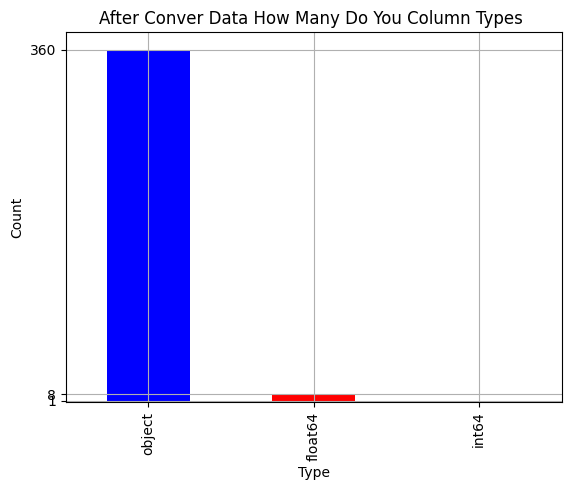

In [38]:

plt.title('after conver data how many do you column types '.title())
plt.xlabel('type'.title())
plt.ylabel('count'.title())
data.dtypes.value_counts().plot(kind='bar',color=['blue','red','yellow'])
plt.yticks(data.dtypes.value_counts().values)
plt.grid()
plt.show()


# show the arab country from  column Q3


In [40]:
print('the unique value of Q3 \n',data['Q3'].unique(),'\n\n')

arap_country=", Algeria, Bahrain, the Comoros Islands, Djibouti, Egypt, Iraq, Jordan, Kuwait, Lebanon, Libya, Morocco, Mauritania, Oman, Palestine, Qatar, Saudi Arabia, Somalia, Sudan, Syria, Tunisia, United Arab Emirates, Yemen".split(', ')

df_arap=data[data['Q3'].isin(arap_country)]

print(df_arap['Q3'])


the unique value of Q3 
 ['India' 'Indonesia' 'Pakistan' 'Mexico' 'Russia' 'Turkey' 'Australia'
 'Nigeria' 'Greece' 'Belgium' 'Japan' 'Egypt' 'Singapore' 'Brazil'
 'Poland' 'China' 'Iran, Islamic Republic of...'
 'United States of America' 'Italy' 'Viet Nam' 'Israel' 'Peru'
 'South Africa' 'Other' 'Spain' 'Bangladesh'
 'United Kingdom of Great Britain and Northern Ireland' 'France'
 'Switzerland' 'Algeria' 'Tunisia' 'Argentina' 'Sweden' 'Colombia'
 'I do not wish to disclose my location' 'Canada' 'Chile' 'Netherlands'
 'Ukraine' 'Saudi Arabia' 'Romania' 'Morocco' 'Austria' 'Taiwan' 'Kenya'
 'Belarus' 'Ireland' 'Portugal' 'Hong Kong (S.A.R.)' 'Denmark' 'Germany'
 'South Korea' 'Philippines' 'Sri Lanka' 'United Arab Emirates' 'Uganda'
 'Ghana' 'Malaysia' 'Thailand' 'Nepal' 'Kazakhstan' 'Ethiopia' 'Iraq'
 'Ecuador' 'Norway' 'Czech Republic'] 


20                      Egypt
34                      Egypt
37                      Egypt
48                      Egypt
85                    Alge


# lines plot for age distribution


In [41]:
age_group=df_arap['Q1'].value_counts().sort_index() 
x=age_group.index
y=age_group.values




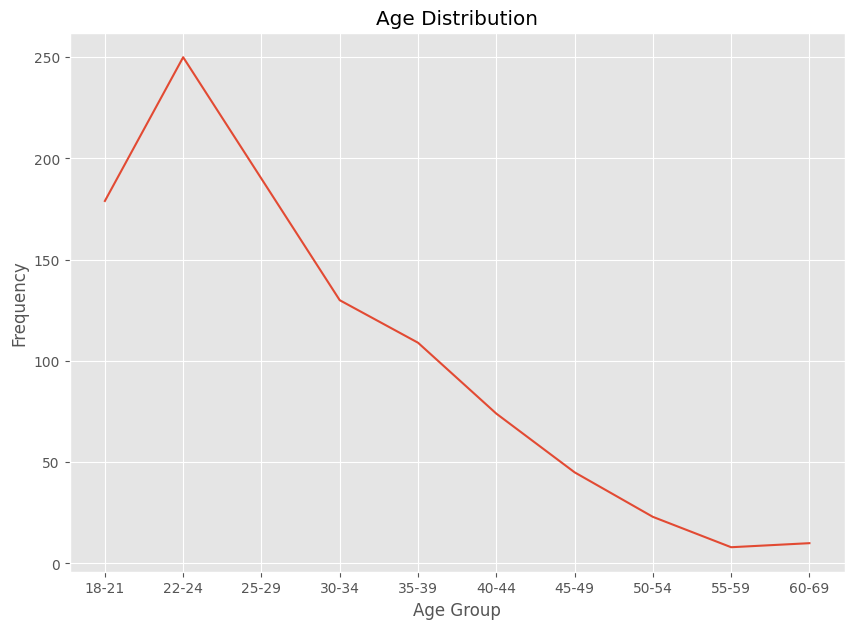

In [43]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.plot(x,y)
plt.title('age distribution'.title())
plt.ylabel('frequency'.title())
plt.xlabel('age group'.title())
plt.savefig('Age_distribytion.png')
plt.show()


# countries distribution

In [44]:

country=df_arap['Q3'].value_counts()
print(country)
x=country.index
y=country.values


Egypt                   482
Morocco                 140
United Arab Emirates    111
Tunisia                 109
Saudi Arabia             89
Algeria                  44
Iraq                     43
Name: Q3, dtype: int64


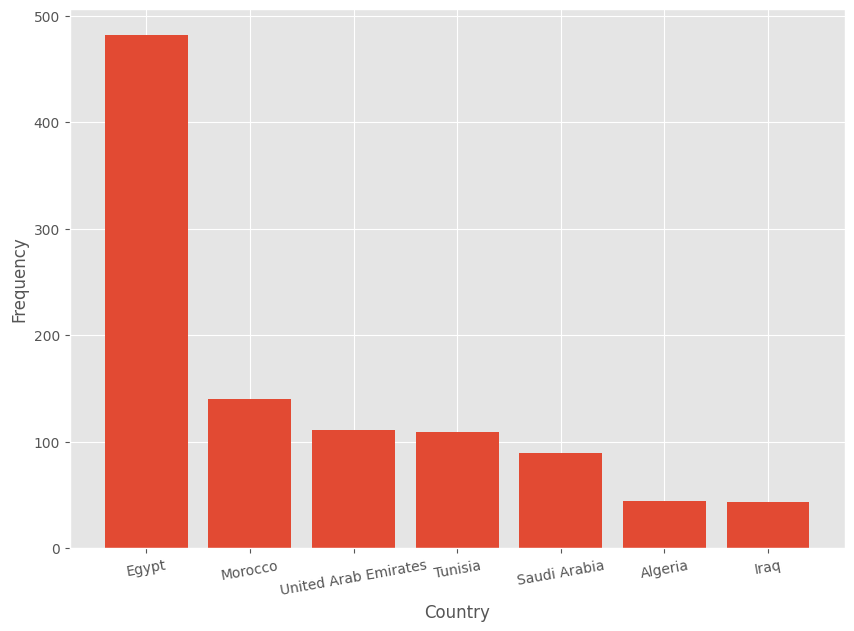

In [45]:
plt.style.use('ggplot')
plt.figure(figsize=(10,7))
plt.xlabel('country'.title())
plt.ylabel('frequency'.title())
plt.bar(x,y)
plt.xticks(rotation=10)
plt.savefig('country_distribution.png')
plt.show()


Arab Kaggle users by programming language Distribution

In [51]:
Q7_column=df_arap.columns[df_arap.columns.str.contains('Q7')]

In [56]:
dic_7=dict()
for col in Q7_column:
    key=df_arap[col].value_counts().index[0]
    dic_7[key]=df_arap[col].value_counts().values[0]
print(dic_7)

{'Python': 838, 'R': 151, 'SQL': 449, 'C': 241, 'C++': 293, 'Java': 277, 'Javascript': 212, 'Julia': 5, 'Swift': 14, 'Bash': 54, 'MATLAB': 183, 'None': 9, 'Other': 98}


In [58]:
Q7_series=pd.Series(dic_7)
print(Q7_series)

Python        838
R             151
SQL           449
C             241
C++           293
Java          277
Javascript    212
Julia           5
Swift          14
Bash           54
MATLAB        183
None            9
Other          98
dtype: int64


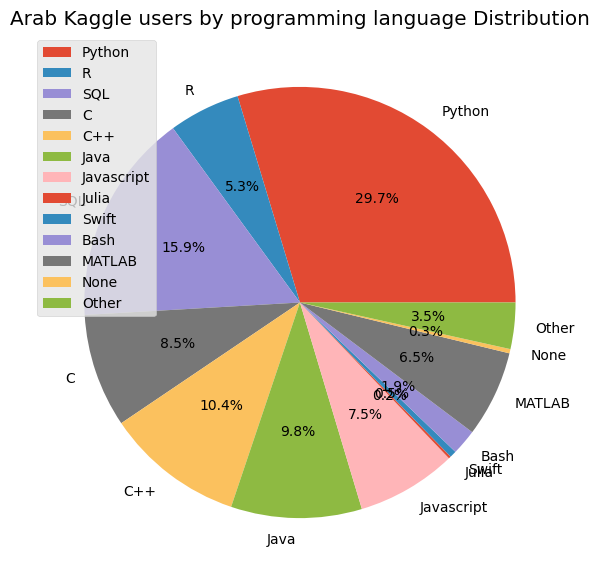

In [69]:
plt.figure(figsize=(10,7))
plt.title('Arab Kaggle users by programming language Distribution')
plt.pie(Q7_series,labels=Q7_series.index,autopct='%1.1f%%')
plt.xticks(rotation=10)
plt.legend(Q7_series.index)
plt.show()

In [100]:
color=['#6ee1fa','#65d4ee','#5cc6e3','#54b9d7','#4caccb','#449fbf','#3c93b3','#3586a7','#2d7a9b','#266e8f','#1f6282','#175776','#104c6b','#07415f','#003653']

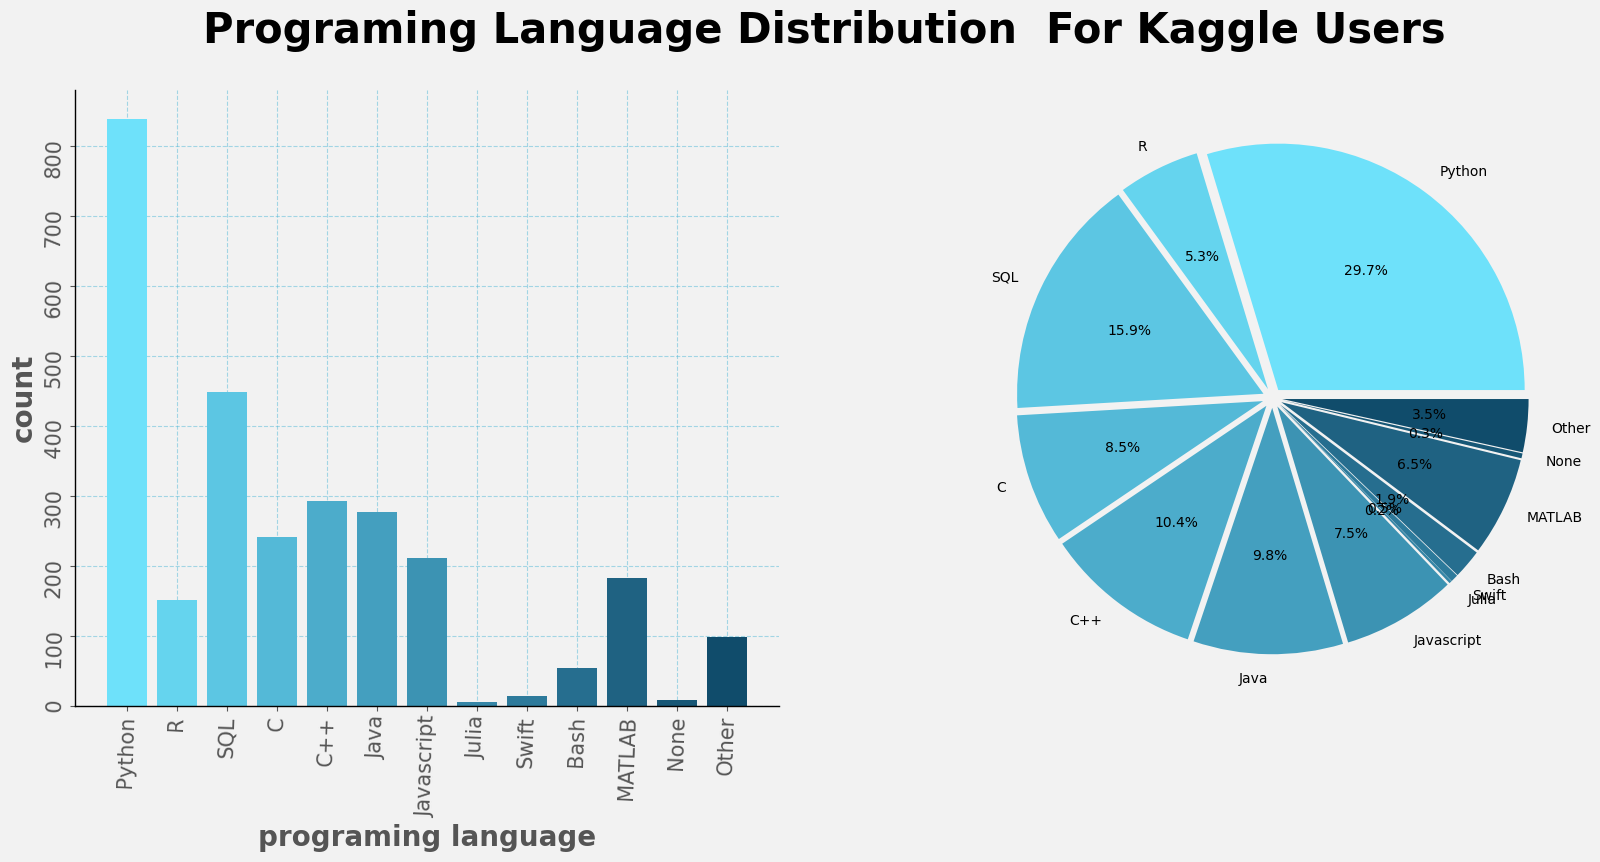

In [117]:
fig, axes=plt.subplots(1, 2,figsize=(20,8))
fig.patch.set_facecolor('#f2f2f2')
axes[0].bar(Q7_series.index,Q7_series.values,color=color)
axes[0].set_ylabel('count',weight='semibold',size=20)
axes[0].set_xlabel('programing language',weight='semibold',size=20)
axes[0].tick_params(labelrotation=88,labelsize=15)
axes[0].patch.set_facecolor('#f2f2f2')
axes[0].grid(color=color[3],alpha=0.5,linestyle='--')
axes[0].spines['bottom'].set_color('black')
axes[0].spines['left'].set_color('black')
axes[0].spines['right'].set_visible(False)
axes[0].spines['top'].set_visible(False)

axes[1].pie(Q7_series.values,labels=Q7_series.index,autopct='%1.1f%%',colors=color,explode=[0.04 for i in range(len(Q7_series.index))])
axes[1].tick_params(labelrotation=88,labelsize=15)
plt.suptitle('programing language distribution  for kaggle users'.title(),weight='bold',size=30)
plt.savefig('programing language distribution  for kaggle users.png')
plt.show()


Julia           5
None            9
Swift          14
Bash           54
Other          98
R             151
MATLAB        183
Javascript    212
C             241
Java          277
C++           293
SQL           449
Python        838
dtype: int64
